In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
mode = "HVD"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 282s 2s/step - loss: 1.7446 - rpn_class_loss: 0.0485 - rpn_bbox_loss: 0.4359 - mrcnn_class_loss: 0.2938 - mrcnn_bbox_loss: 0.4644 - mrcnn_mask_loss: 0.5019 - val_loss: 1.5737 - val_rpn_class_loss: 0.0290 - val_rpn_bbox_loss: 0.4658 - val_mrcnn_class_loss: 0.2144 - val_mrcnn_bbox_loss: 0.4606 - val_mrcnn_mask_loss: 0.4038
Epoch 2/10
150/150 [==============================] - 126s 839ms/step - loss: 1.2940 - rpn_class_loss: 0.0345 - rpn_bbox_loss: 0.3349 - mrcnn_class_loss: 0.2318 - mrcnn_bbox_loss: 0.3385 - mrcnn_mask_loss: 0.3542 - val_loss: 1.4752 - val_rpn_class_loss: 0.0250 - val_rpn_bbox_loss: 0.4065 - val_mrcnn_class_loss: 0.2289 - val_mrcnn_bbox_loss: 0.4232 - val_mrcnn_mask_loss: 0.3916
Epoch 3/10
150/150 [==============================] - 114s 758ms/step - loss: 1.0420 - rpn_class_loss: 0.0239 - rpn_bbox_loss: 0.2629 - mrcnn_class_loss: 0.1806 - mrcnn_bbox_loss: 0.2653 - mrcnn_mask_loss: 0.3092 - val_loss: 1.4698 - val_rpn_c

In [4]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_hvd20181220T1038/mask_rcnn_sdmaskrcnn_finetune_hvd_0007.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_hvd20181220T1038/mask_rcnn_sdmaskrcnn_finetune_hvd_0007.h5
Re-starting from epoch 7


{'rois': array([[115, 309, 250, 462],
       [107, 100, 300, 279],
       [328, 307, 422, 402],
       [274, 388, 392, 506],
       [252, 240, 337, 329],
       [257, 382, 323, 456],
       [314, 279, 348, 311],
       [294, 288, 355, 374],
       [211, 305, 319, 402],
       [ 89, 136, 137, 266],
       [352, 441, 416, 509],
       [178, 423, 268, 508],
       [227, 228, 290, 294],
       [118, 308, 200, 385],
       [238, 398, 268, 459],
       [118, 100, 182, 204],
       [131, 255, 257, 305],
       [182, 307, 212, 334],
       [178, 308, 217, 370]], dtype=int32), 'scores': array([0.99980265, 0.9994966 , 0.99892443, 0.99872714, 0.9982066 ,
       0.99521106, 0.9768868 , 0.97122294, 0.96914166, 0.9557055 ,
       0.92511183, 0.91932005, 0.87943363, 0.8106668 , 0.8020101 ,
       0.7945107 , 0.7466853 , 0.72361094, 0.7004806 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)}
(512, 512, 19)


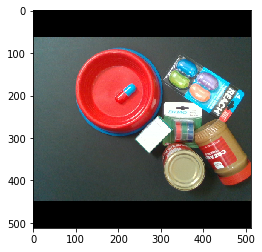

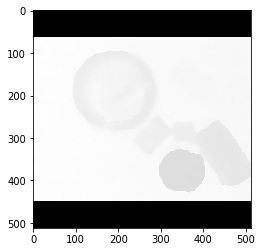

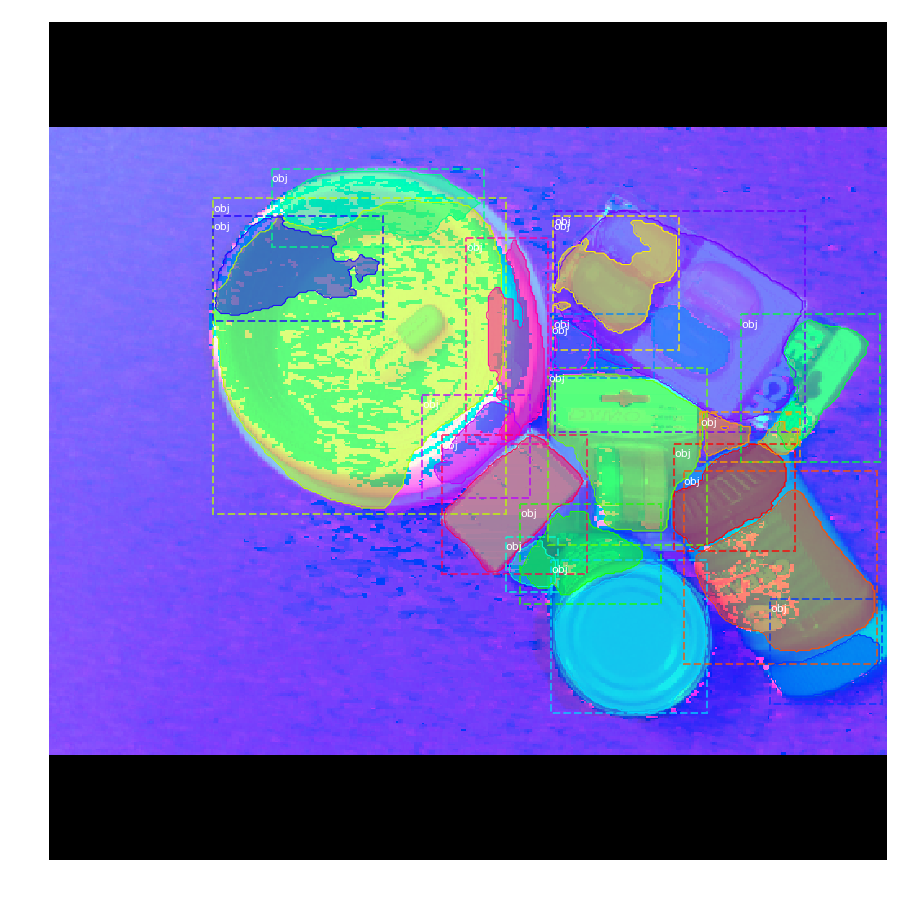

{'rois': array([[341, 194, 439, 262],
       [178, 422, 240, 465],
       [223, 241, 330, 369],
       [323, 321, 435, 421],
       [240, 367, 324, 436],
       [179,  21, 234, 156],
       [163,  91, 212, 209],
       [135, 209, 207, 315],
       [155, 277, 183, 311],
       [242, 193, 342, 245],
       [236, 367, 273, 424],
       [206,  17, 235,  89],
       [181, 100, 212, 164],
       [197, 215, 233, 346],
       [323, 262, 366, 326],
       [324, 245, 438, 347]], dtype=int32), 'scores': array([0.999747  , 0.9995902 , 0.9994585 , 0.9988319 , 0.99842274,
       0.9979013 , 0.9965616 , 0.9951468 , 0.89610595, 0.825104  ,
       0.80585784, 0.7848496 , 0.7842477 , 0.7817929 , 0.7481193 ,
       0.7215166 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 16)


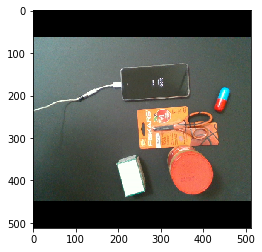

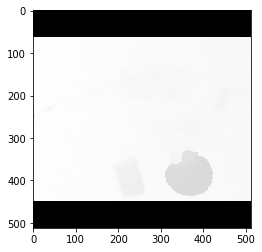

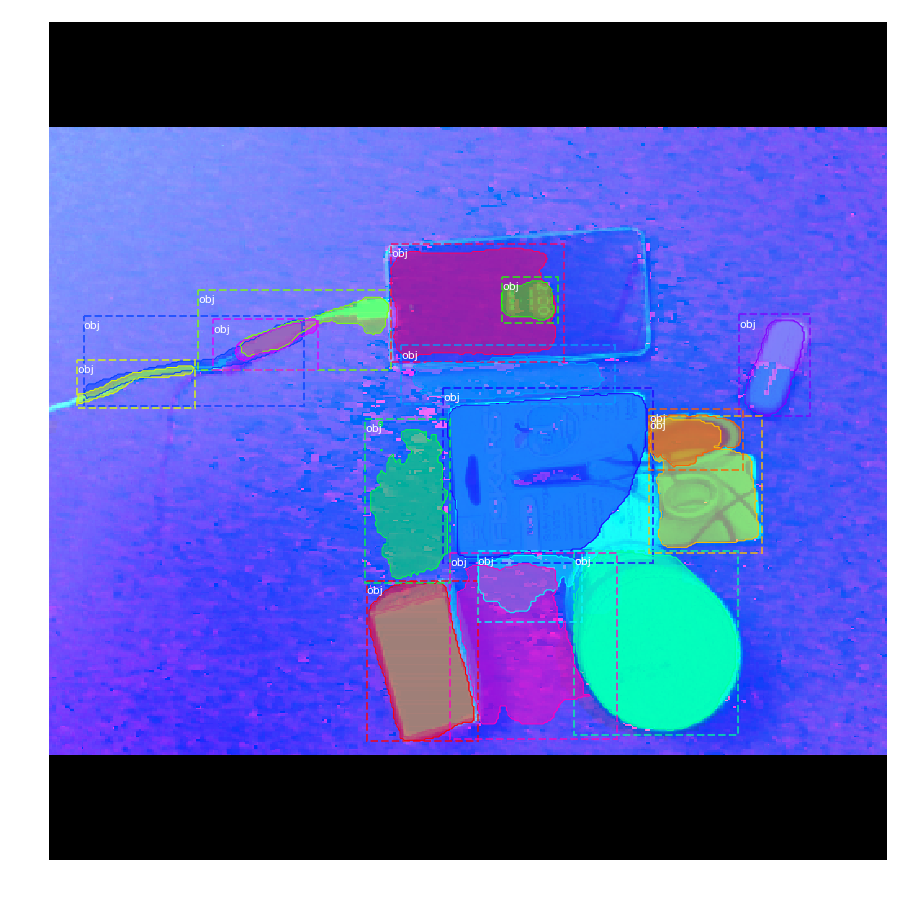

{'rois': array([[350, 272, 405, 330],
       [166, 318, 226, 393],
       [142, 152, 223, 245],
       [204, 298, 294, 385],
       [290, 188, 348, 235],
       [310, 424, 382, 509],
       [217, 167, 296, 252],
       [251, 376, 318, 498],
       [133, 295, 178, 419],
       [164, 186, 278, 353],
       [ 65, 340, 139, 437],
       [159, 386, 255, 459],
       [234, 133, 278, 191],
       [202, 183, 255, 307],
       [206, 337, 272, 402],
       [111, 258, 169, 376],
       [303, 374, 404, 441],
       [142, 152, 172, 249],
       [312, 186, 389, 247],
       [247, 300, 318, 369]], dtype=int32), 'scores': array([0.99967945, 0.9887593 , 0.97870904, 0.9746489 , 0.961177  ,
       0.9504113 , 0.94976795, 0.94465923, 0.93398607, 0.9251737 ,
       0.91138726, 0.9020794 , 0.8521693 , 0.83798057, 0.82988787,
       0.8194281 , 0.7972939 , 0.7684714 , 0.7134539 , 0.7110913 ],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=in

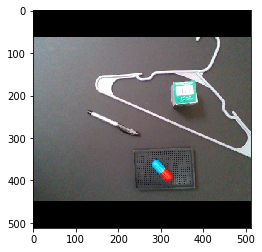

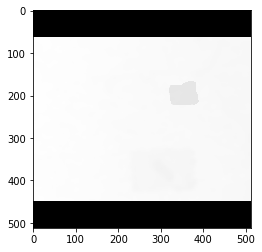

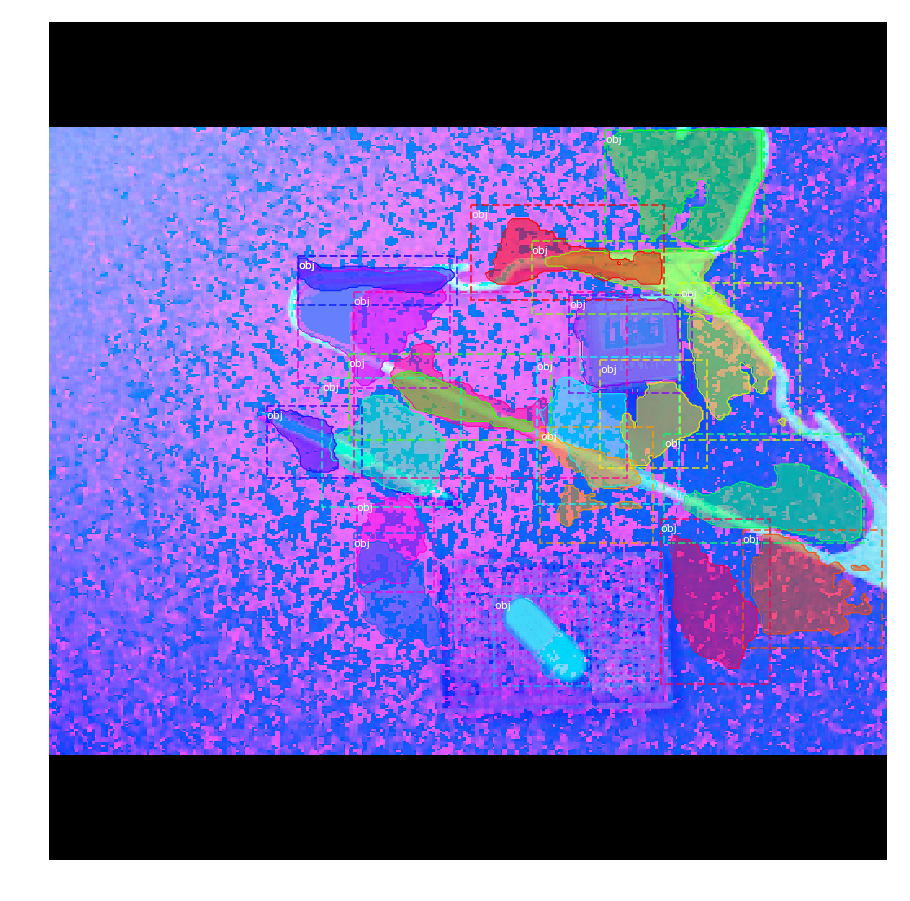

{'rois': array([[278, 149, 371, 242],
       [157, 209, 264, 349],
       [169, 324, 329, 413],
       [330, 369, 365, 422],
       [145, 374, 264, 478],
       [241,  80, 385, 160],
       [ 85, 380, 149, 476],
       [241, 288, 334, 352],
       [226, 131, 270, 245],
       [353, 128, 413, 216],
       [132, 129, 208, 229],
       [ 84, 164, 168, 364],
       [373, 152, 415, 262],
       [ 97, 150, 141, 218],
       [154, 205, 230, 250],
       [220,  86, 267, 185],
       [175,  87, 233, 214],
       [ 58, 162, 110, 289],
       [177, 401, 243, 463],
       [235, 324, 291, 357],
       [124, 144, 150, 178],
       [136, 295, 185, 401]], dtype=int32), 'scores': array([0.99876785, 0.998094  , 0.9960064 , 0.9866105 , 0.9862918 ,
       0.9816804 , 0.976962  , 0.9726169 , 0.95176834, 0.95008916,
       0.9312025 , 0.88660425, 0.85966057, 0.85445625, 0.8202757 ,
       0.8026947 , 0.7926323 , 0.74600655, 0.73904014, 0.7370463 ,
       0.71419275, 0.70562196], dtype=float32), 'class_ids':

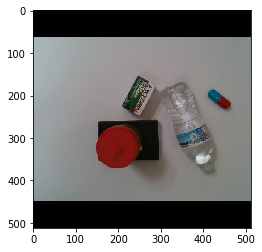

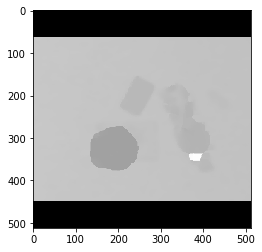

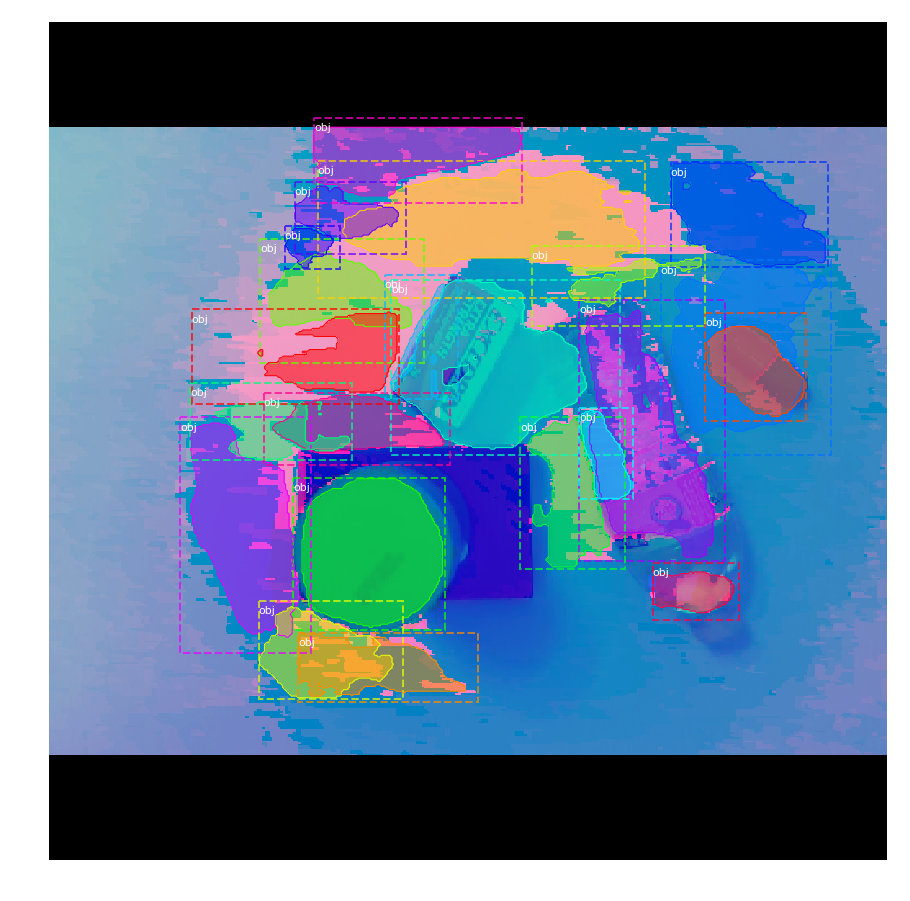

{'rois': array([[325, 404, 389, 487],
       [245, 163, 323, 251],
       [189, 400, 247, 496],
       [163, 323, 326, 412],
       [275, 455, 326, 490],
       [244, 402, 326, 482],
       [169, 212, 295, 308],
       [217, 249, 381, 352],
       [143, 404, 203, 503],
       [341, 244, 393, 301],
       [127, 127, 226, 254],
       [181, 101, 227, 217],
       [222, 116, 276, 201],
       [299, 204, 376, 301],
       [305, 253, 373, 328],
       [279, 196, 329, 259],
       [ 96, 161, 167, 382],
       [ 88, 354, 137, 437],
       [239, 134, 333, 203],
       [ 92, 310, 172, 423],
       [220, 185, 249, 214],
       [317, 330, 365, 371],
       [206,  78, 248, 134]], dtype=int32), 'scores': array([0.9999778 , 0.9974941 , 0.9974349 , 0.9961427 , 0.9952551 ,
       0.99096996, 0.98016584, 0.9800077 , 0.96175885, 0.96110356,
       0.9606126 , 0.955964  , 0.95454043, 0.9399878 , 0.93167865,
       0.92018175, 0.8957321 , 0.8934184 , 0.885543  , 0.8754349 ,
       0.8356676 , 0.7451531 , 

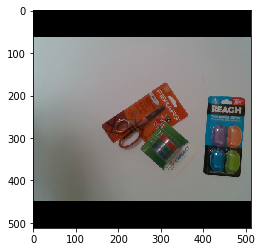

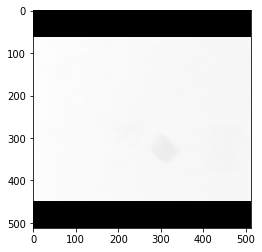

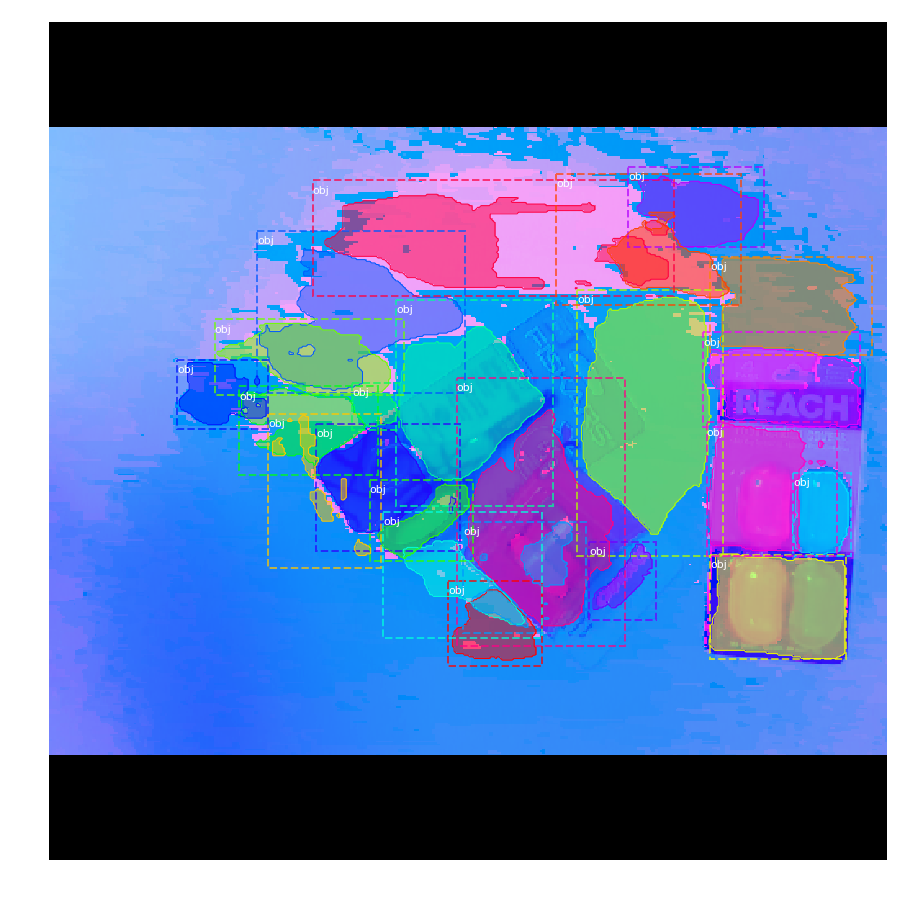

{'rois': array([[185, 216, 370, 339],
       [280, 277, 375, 395],
       [176, 428, 240, 497],
       [184, 105, 264, 211],
       [330, 205, 407, 326],
       [104, 135, 148, 212],
       [153, 261, 301, 405],
       [178, 159, 232, 243],
       [137, 116, 166, 173],
       [281,  77, 330, 152],
       [105, 277, 176, 408],
       [ 92, 156, 124, 229],
       [249, 328, 288, 387],
       [222, 147, 300, 213],
       [213, 318, 301, 377],
       [145, 153, 205, 260],
       [159, 370, 264, 451],
       [142, 264, 190, 398],
       [187, 321, 333, 428],
       [331, 180, 411, 255],
       [222,  94, 315, 152],
       [ 65, 276, 114, 401],
       [250, 148, 276, 194],
       [ 89, 386, 168, 463]], dtype=int32), 'scores': array([0.998459  , 0.9921153 , 0.99185586, 0.97924304, 0.9781998 ,
       0.97719586, 0.9684974 , 0.96778965, 0.96605575, 0.95886254,
       0.9520698 , 0.9461775 , 0.9454761 , 0.9424788 , 0.9351838 ,
       0.9218675 , 0.9029049 , 0.90018684, 0.85978884, 0.85027015,
  

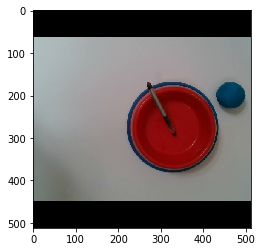

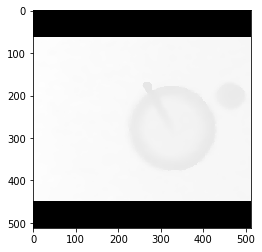

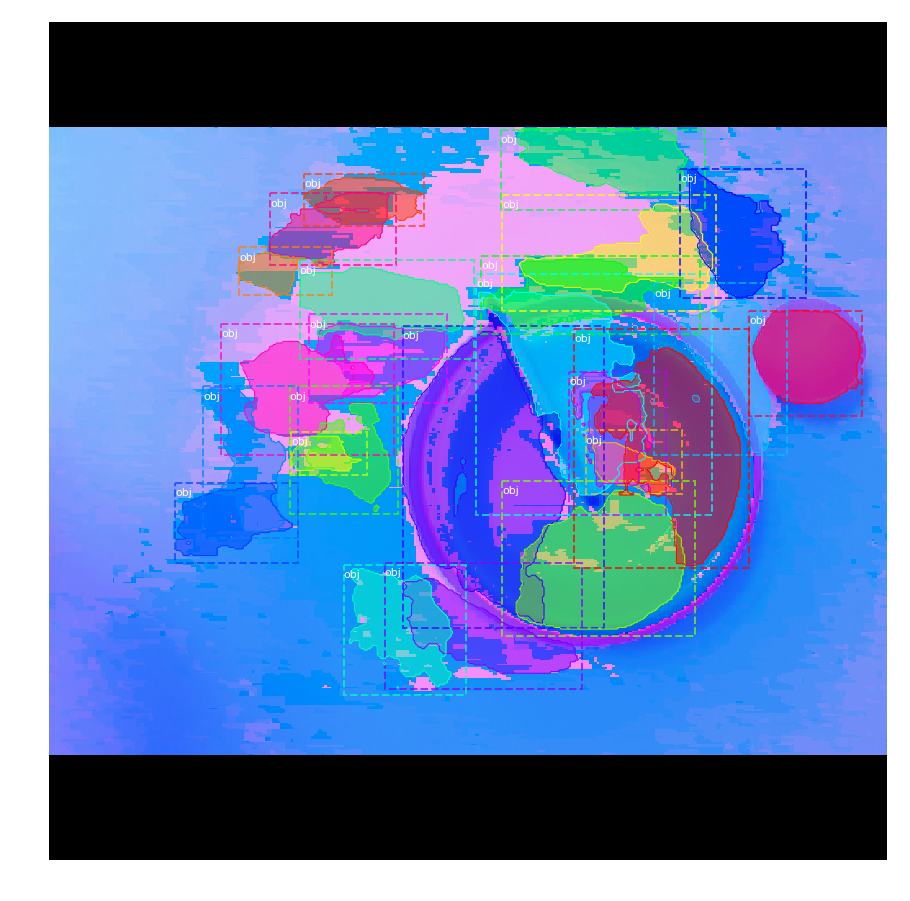

{'rois': array([[ 87, 268, 187, 331],
       [234, 417, 316, 505],
       [210, 260, 319, 471],
       [114, 370, 250, 494],
       [217,  83, 271, 212],
       [318, 108, 397, 260],
       [197, 273, 261, 375],
       [245,  86, 321, 275],
       [137, 321, 253, 437],
       [363,  61, 446, 233],
       [211, 207, 310, 293],
       [309, 148, 353, 269],
       [ 95,  87, 150, 146],
       [290,  47, 354, 119],
       [154, 149, 226, 319],
       [265,  82, 314, 182],
       [133, 451, 170, 509],
       [256, 263, 317, 353],
       [186, 197, 249, 316],
       [ 65, 135, 124, 302],
       [392, 137, 450, 255],
       [224,  65, 295, 130],
       [156, 441, 196, 509],
       [ 81, 324, 149, 476],
       [283,  59, 360, 261],
       [317, 210, 404, 271],
       [327,  59, 358, 128],
       [ 79, 443, 146, 512],
       [278, 153, 325, 275],
       [222,  67, 246,  99],
       [324, 102, 390, 172],
       [146, 317, 210, 397]], dtype=int32), 'scores': array([0.9990927 , 0.9985279 , 0.98767

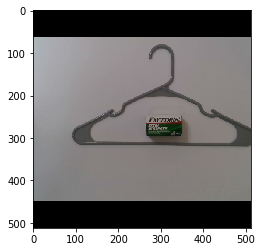

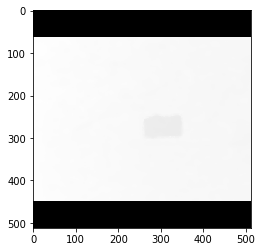

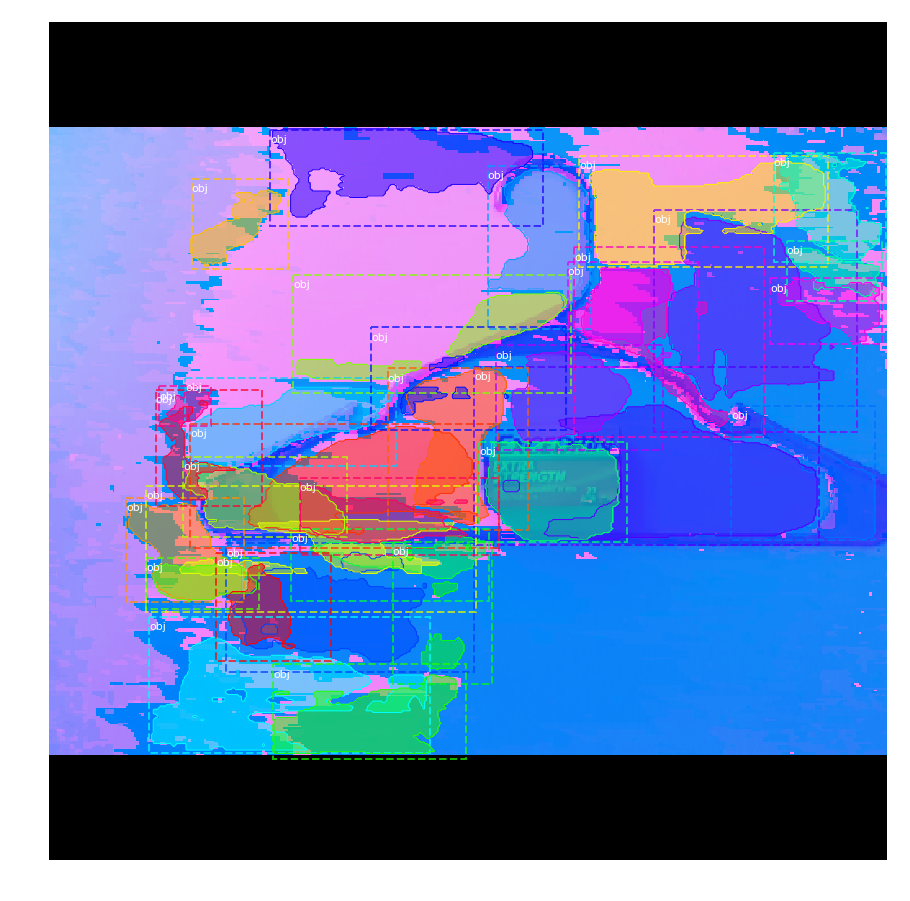

{'rois': array([[158, 271, 257, 365],
       [269, 168, 363, 322],
       [194, 199, 272, 290],
       [ 99, 273, 167, 346],
       [242, 163, 295, 267],
       [ 84, 396, 161, 469],
       [323, 109, 351, 154],
       [342, 308, 397, 391],
       [287, 247, 359, 353],
       [311, 341, 350, 407],
       [290, 128, 360, 221],
       [239, 218, 265, 269],
       [323, 142, 389, 221],
       [381, 155, 440, 259],
       [192, 228, 222, 274],
       [321, 253, 369, 330],
       [299, 173, 329, 215],
       [100, 304, 171, 404],
       [295, 283, 351, 415],
       [ 60, 158,  96, 315],
       [124, 272, 162, 314]], dtype=int32), 'scores': array([0.994391  , 0.9922254 , 0.991711  , 0.99096113, 0.9869718 ,
       0.9829662 , 0.9745915 , 0.97409624, 0.94460666, 0.93718415,
       0.92706114, 0.92359173, 0.9042172 , 0.8616959 , 0.8562617 ,
       0.84144336, 0.8154668 , 0.7933323 , 0.76248085, 0.7266152 ,
       0.70041966], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

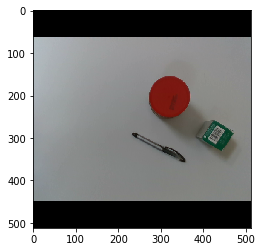

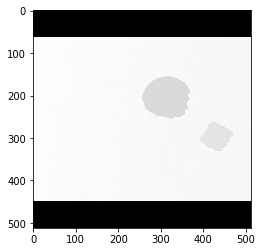

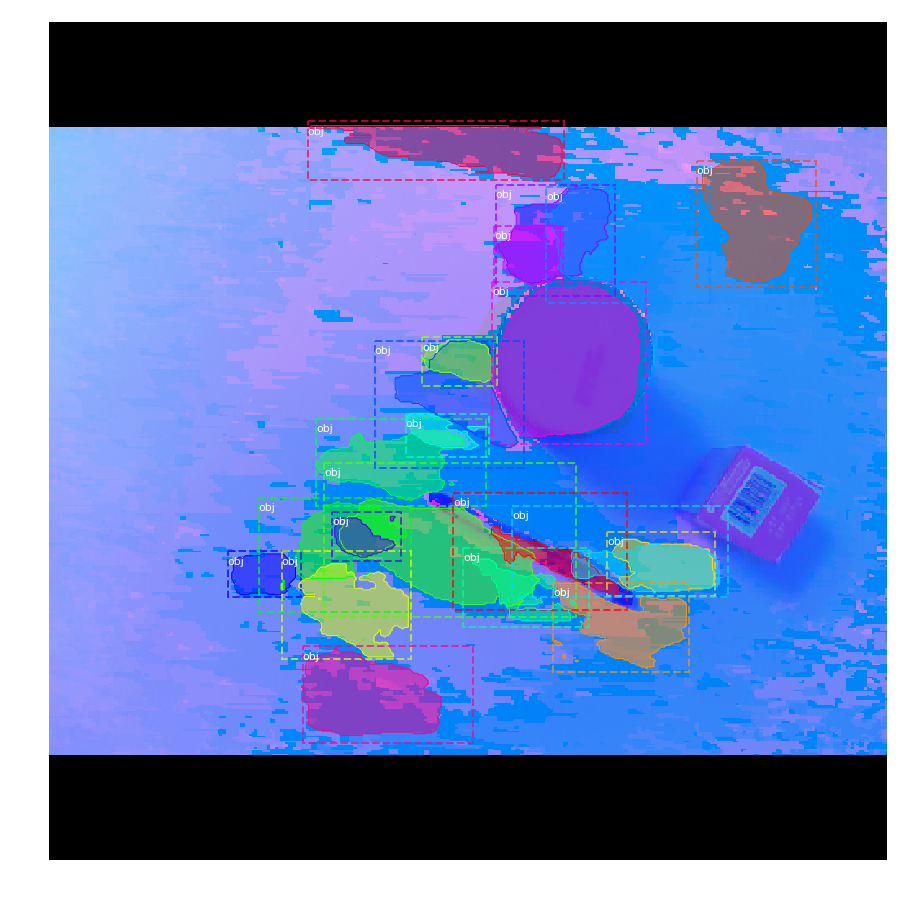

In [5]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    hsv = (skimage.color.convert_colorspace(color, "RGB", "HSV") * 255).astype(np.uint8)
    inp_img = np.zeros(hsv.shape)
    inp_img[..., 0] = hsv[..., 0]
    inp_img[..., 1] = hsv[..., 2]
    inp_img[..., 2] = depth[..., 0]
    detect(model, inp_img)